dataset loaded successfully
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
Shape of X: (70000, 784)
--------------------------
['5' '0' '4' ... '4' '5' '6']
<class 'numpy.ndarray'>
Shape of y: (70000,)


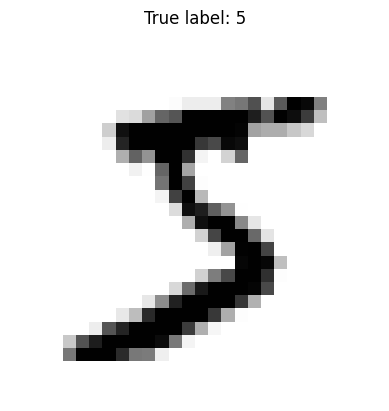

Training Set size: 60000
Test Set size: 10000


InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'saga', 'lbfgs', 'liblinear', 'newton-cholesky', 'newton-cg', 'sag'}. Got 'ibfgs' instead.

In [43]:
import ssl
# For data loading and manipulation
from sklearn.datasets import fetch_openml
import numpy as np

# For building and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluation and visualization
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


mnist = fetch_openml('mnist_784',version=1,as_frame=False,parser='auto')
x,y = mnist.data , mnist.target
print("dataset loaded successfully")


print(x)
print(type(x))
print("Shape of X:",x.shape)

print("--------------------------")

print(y)
print(type(y))
print("Shape of y:",y.shape)

some_digits_index = 0 
some_digits_index_image = x[some_digits_index].reshape(28,28)
true_label = y[some_digits_index]

plt.imshow(some_digits_index_image,cmap="binary")
plt.title(f"True label: {true_label}")
plt.axis("off")
plt.show()


x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

print("Training Set size:",len(x_train_scaled))
print("Test Set size:",len(x_test_scaled))


softmax_reg = LogisticRegression(multi_class='multinomial',solver='ibfgs',max_iter=1000,random_state=42)
softmax_reg.fit(x_train_scaled,y_train)
y_pred = softmax_reg.predict(x_test_scaled)


accuracy = accuracy_score(y_test,y_pred)
print(f"Model Accuracy on test Set: {accuracy:.4f}")


print("\n Display Confusion matrix...")
fig , ax = plt.subplot(figsize(10,10))
print('ax',ax)
ConfusionMatrixDisplay.from_estimator(softmax_reg,x_test_scaled,y_test,ax=ax,cmap='inferno')
plt.title("Confusion Matrix")
plt.show()